3. Kickstarter Project Success - Robin & Peter, Manuel & Simon


In recent years, the range of funding options for projects created by individuals and small companies has expanded considerably. In addition to savings, bank loans, friends & family funding and other traditional options, crowdfunding has become a popular and readily available alternative. 

Kickstarter, founded in 2009, is one particularly well-known and popular crowdfunding platform. It has an all-or-nothing funding model, whereby a project is only funded if it meets its goal amount; otherwise no money is given by backers to a project.
A huge variety of factors contribute to the success or failure of a project — in general, and also on Kickstarter. Some of these are able to be quantified or categorized, which allows for the construction of a model to attempt to predict whether a project will succeed or not. The aim of this project is to construct such a model and also to analyse Kickstarter project data more generally, in order to help potential project creators assess whether or not Kickstarter is a good funding option for them, and what their chances of success are.


# Project 2: Kickstarter Project Success

## Import libraries

In [3]:
# Pandas as NumPy
import pandas as pd
import numpy as np

# Scikit-Learn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, roc_curve, confusion_matrix 

# Pyplot
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split


# Others
from os import listdir
import time


## Read in the data

In [4]:
base_path = './data/'

data = pd.concat([pd.read_csv(base_path+x) for x in sorted(listdir(base_path))], axis=0)
data_cp = data.copy()

In [5]:
# Create df for the second half of colu,ns
data_sh = data.iloc[:, 17:]

In [6]:
data.shape

(209222, 37)

In [7]:
data.isna().sum()

backers_count                    0
blurb                            8
category                         0
converted_pledged_amount         0
country                          0
created_at                       0
creator                          0
currency                         0
currency_symbol                  0
currency_trailing_code           0
current_currency                 0
deadline                         0
disable_communication            0
friends                     208922
fx_rate                          0
goal                             0
id                               0
is_backing                  208922
is_starrable                     0
is_starred                  208922
launched_at                      0
location                       226
name                             0
permissions                 208922
photo                            0
pledged                          0
profile                          0
slug                             0
source_url          

In [8]:
data.columns

Index(['backers_count', 'blurb', 'category', 'converted_pledged_amount',
       'country', 'created_at', 'creator', 'currency', 'currency_symbol',
       'currency_trailing_code', 'current_currency', 'deadline',
       'disable_communication', 'friends', 'fx_rate', 'goal', 'id',
       'is_backing', 'is_starrable', 'is_starred', 'launched_at', 'location',
       'name', 'permissions', 'photo', 'pledged', 'profile', 'slug',
       'source_url', 'spotlight', 'staff_pick', 'state', 'state_changed_at',
       'static_usd_rate', 'urls', 'usd_pledged', 'usd_type'],
      dtype='object')

In [9]:
data_sh.describe()

,launched_at,pledged,state_changed_at,static_usd_rate,usd_pledged
count,2.092220e+05,2.092220e+05,2.092220e+05,209222.000000,2.092220e+05
mean,1.460206e+09,1.881403e+04,1.462838e+09,1.010757,1.289213e+04
std,6.309029e+07,3.229596e+05,6.290421e+07,0.231893,8.890124e+04
min,1.240603e+09,0.000000e+00,1.241334e+09,0.008771,0.000000e+00
25%,1.417639e+09,1.100000e+02,1.420485e+09,1.000000,1.060014e+02
50%,1.461924e+09,1.556000e+03,1.464709e+09,1.000000,1.537358e+03
75%,1.516694e+09,6.887200e+03,1.519366e+09,1.000000,6.550000e+03
max,1.552537e+09,8.103074e+07,1.552537e+09,1.716408,8.596475e+06


Description of columns would be helpful!

In [10]:
data_sh.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 209222 entries, 0 to 964
Data columns (total 20 columns):
is_backing          300 non-null object
is_starrable        209222 non-null bool
is_starred          300 non-null object
launched_at         209222 non-null int64
location            208996 non-null object
name                209222 non-null object
permissions         300 non-null object
photo               209222 non-null object
pledged             209222 non-null float64
profile             209222 non-null object
slug                209222 non-null object
source_url          209222 non-null object
spotlight           209222 non-null bool
staff_pick          209222 non-null bool
state               209222 non-null object
state_changed_at    209222 non-null int64
static_usd_rate     209222 non-null float64
urls                209222 non-null object
usd_pledged         209222 non-null float64
usd_type            208742 non-null object
dtypes: bool(3), float64(3), int64(2), object(

In [11]:
# significant amout of missing data in these columns, ignore for now
# Define a list columns to drop
droplist = []
droplist = droplist+['is_backing', 'is_starred', 'permissions']

### The predicted variable: 'state'

In [12]:
data_sh['state'].describe()

count         209222
unique             5
top       successful
freq          117465
Name: state, dtype: object

In [13]:
data_sh['state'].value_counts()

successful    117465
failed         75199
canceled        8624
live            7311
suspended        623
Name: state, dtype: int64

In [14]:
# Calculate percentage of 'state' value that are not either 'successful' or 'failed'
abs(len(data_sh[(data_sh['state'] == 'successful') | (data_sh['state'] == 'failed')]) - len(data_sh)) / len(data_sh)

0.07914081693129786

'state' has 5 different values: 'successful', 'failed', 'canceled', 'live', and 'suspended'. If we want binary target class to be binary, we would loose approx 8% of the dataset.

In [15]:
data_sh[(data_sh['state'] == 'successful') | (data_sh['state'] == 'failed')].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192664 entries, 0 to 964
Data columns (total 20 columns):
is_backing          0 non-null object
is_starrable        192664 non-null bool
is_starred          0 non-null object
launched_at         192664 non-null int64
location            192449 non-null object
name                192664 non-null object
permissions         0 non-null object
photo               192664 non-null object
pledged             192664 non-null float64
profile             192664 non-null object
slug                192664 non-null object
source_url          192664 non-null object
spotlight           192664 non-null bool
staff_pick          192664 non-null bool
state               192664 non-null object
state_changed_at    192664 non-null int64
static_usd_rate     192664 non-null float64
urls                192664 non-null object
usd_pledged         192664 non-null float64
usd_type            192626 non-null object
dtypes: bool(3), float64(3), int64(2), object(12)
me

In [16]:
# New dataframe which contains only entries which have the state 'successful' or 'failed'
filtered_df = data_sh[(data_sh['state'] == 'successful') | (data_sh['state'] == 'failed')].copy()
filtered_df.reset_index(inplace=True)

In [17]:
filtered_df.columns

Index(['index', 'is_backing', 'is_starrable', 'is_starred', 'launched_at',
       'location', 'name', 'permissions', 'photo', 'pledged', 'profile',
       'slug', 'source_url', 'spotlight', 'staff_pick', 'state',
       'state_changed_at', 'static_usd_rate', 'urls', 'usd_pledged',
       'usd_type'],
      dtype='object')

### The 'is_starrable' column
is_starrable - whether or not a project can be starred (liked and saved) by users

In [18]:
col = 'is_starrable'

In [19]:
filtered_df[col].head()

0    False
1    False
2    False
3    False
4    False
Name: is_starrable, dtype: bool

In [20]:
filtered_df[col].value_counts()

False    192664
Name: is_starrable, dtype: int64

In [472]:
filtered_df[col] = filtered_df[col].astype(bool)

In [473]:
filtered_df[col].describe()

count     192664
unique         1
top        False
freq      192664
Name: is_starrable, dtype: object

In [474]:
filtered_df[col].value_counts()

False    192664
Name: is_starrable, dtype: int64

In [475]:
# Any missing values?
filtered_df[col].isnull().sum()

0

In [ ]:
droplist.append(col)

### The 'launched_at' column

launched_at - date and time of when the project was launched for funding

In [476]:
col = 'launched_at'
filtered_df[col].head()

0    1388011046
1    1550073611
2    1478012330
3    1540684582
4    1425919017
Name: launched_at, dtype: int64

In [477]:
# Make human-readable dates out of timestamp
filtered_df[col] = pd.to_datetime(filtered_df[col], unit='s')

In [478]:
#data_sh['launched_at'].iloc[0].dayofweek

filtered_df['launch_weekday'] = [x.day_name() for x in filtered_df['launched_at']]
filtered_df['launch_weekday'] = filtered_df['launch_weekday'].astype(str)
filtered_df['launch_weekday'].dtype

dtype('O')

In [479]:
filtered_df['launch_year'] = [x.year for x in filtered_df['launched_at']]
filtered_df['launch_year'] = filtered_df['launch_year'].astype(int)
filtered_df['launch_year'].dtype

dtype('int64')

In [480]:
filtered_df['launch_month'] = [x.month for x in filtered_df['launched_at']]
filtered_df['launch_month'] = filtered_df['launch_month'].astype(int)
filtered_df['launch_month'].dtype

dtype('int64')

In [481]:
filtered_df['launch_day'] = [x.day for x in filtered_df['launched_at']]
filtered_df['launch_day'] = filtered_df['launch_day'].astype(int)
filtered_df['launch_day'].dtype

dtype('int64')

In [482]:
# Create a new column for launch hour
filtered_df['launch_hour'] = [x.hour for x in filtered_df['launched_at']]
filtered_df['launch_hour'] = filtered_df['launch_hour'].astype(int)
filtered_df['launch_hour'].dtype

dtype('int64')

In [394]:
# TODO: Create bins for launch time

(array([ 6601.,  4971.,  3992.,  3068.,  2717.,  2927.,  4324.,  7956.,
        10409., 10311.,  9609.,  8314.]),
 array([ 0.        ,  1.91666667,  3.83333333,  5.75      ,  7.66666667,
         9.58333333, 11.5       , 13.41666667, 15.33333333, 17.25      ,
        19.16666667, 21.08333333, 23.        ]),
 <a list of 12 Patch objects>)

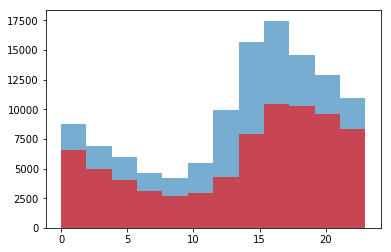

In [395]:
# Compare launch hour of successfull and failed projects
plt.hist(filtered_df[filtered_df['state'] == 'successful']['hour'], bins=12, alpha=0.6)
plt.hist(filtered_df[filtered_df['state'] == 'failed']['hour'], bins=12, alpha=0.6, color='r')

In [396]:
filtered_df['year'].unique()

array([2013, 2019, 2016, 2018, 2015, 2014, 2012, 2017, 2010, 2011, 2009])

In [397]:
# TODO: check whether launch time has changed over years, see whether it changes over the months

### The 'location' column

In [485]:
col = 'location'

filtered_df[col].dtype

dtype('O')

In [399]:
filtered_df[col].head(10)

0    {"id":2379574,"name":"Chicago","slug":"chicago...
1    {"id":2486340,"name":"Sacramento","slug":"sacr...
2    {"id":2383660,"name":"Columbus","slug":"columb...
3    {"id":725746,"name":"Venice","slug":"venice-ve...
4    {"id":2479651,"name":"Redmond","slug":"redmond...
5    {"id":15129,"name":"Cardigan","slug":"cardigan...
6    {"id":2442047,"name":"Los Angeles","slug":"los...
7    {"id":2405641,"name":"Fort Collins","slug":"fo...
8    {"id":2478307,"name":"Raleigh","slug":"raleigh...
9    {"id":2442047,"name":"Los Angeles","slug":"los...
Name: location, dtype: object

Looks like str representantion of a dictionary, turn into dict first.

In [492]:
#start =time.time()
del_idx = []
count = 0

for idx, x in enumerate(filtered_df[col]):

    try:
        filtered_df.at[idx, col] = eval(x.replace('false', 'False').replace('true', 'True').replace('null', 'None'))
        #eval(x.replace('false', 'False').replace('true', 'True').replace('null', 'None'))

    except:
        filtered_df.drop(idx, axis=0, inplace=True)
        del_idx.append(idx)
#end = time.time()
#print(end-start)
filtered_df.reset_index(inplace=True)

In [494]:
filtered_df[col][0]

{'id': 2379574,
 'name': 'Chicago',
 'slug': 'chicago-il',
 'short_name': 'Chicago, IL',
 'displayable_name': 'Chicago, IL',
 'localized_name': 'Chicago',
 'country': 'US',
 'state': 'IL',
 'type': 'Town',
 'is_root': False,
 'urls': {'web': {'discover': 'https://www.kickstarter.com/discover/places/chicago-il',
   'location': 'https://www.kickstarter.com/locations/chicago-il'},
  'api': {'nearby_projects': 'https://api.kickstarter.com/v1/discover?signature=1552595044.c1041c6bca69b0b72738f3b9504ebf921b3e5e0e&woe_id=2379574'}}}

In [496]:
# Count number of unique locations

#len(set([x['name'] for x in filtered_df[col]]))

filtered_df['city'] = [x['name'] for x in filtered_df[col]]

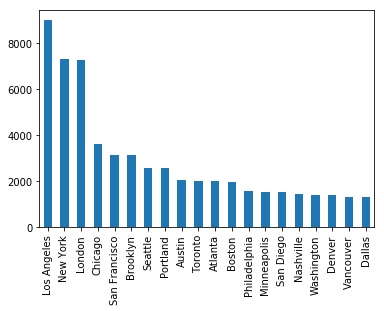

In [516]:
# Top 20 cities by project frequency

filtered_df['city'].value_counts().head(20).plot(kind='bar')

In [521]:
# Top 20 non-US cities

filtered_df['city'][filtered_df['location']['country'] != 'US'].value_counts().head(20).plot(kind='bar')

KeyError: 'country'

In [522]:
filtered_df['location'][0]['country']

'US'

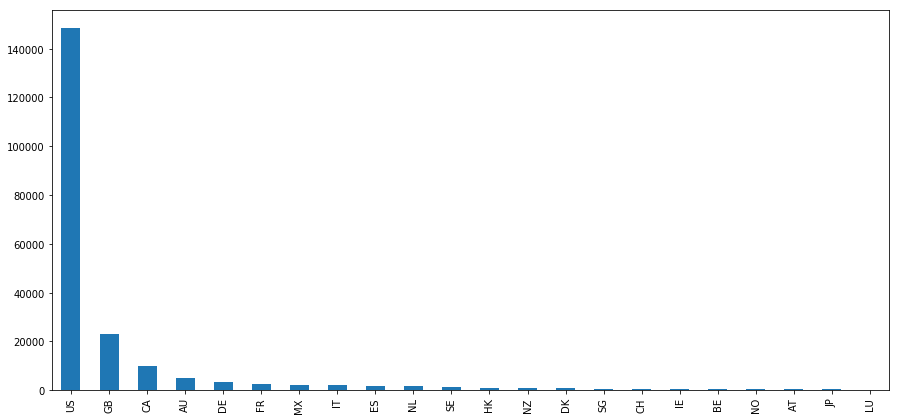

In [515]:
plt.figure(figsize=(15,7))
data['country'].value_counts().plot(kind='bar')

### The 'name' column

In [401]:
col = 'name'
filtered_df[col].describe()

count                        192449
unique                       168248
top       A Midsummer Night's Dream
freq                              7
Name: name, dtype: object

In [402]:
filtered_df[[col]].isna().sum()

name    0
dtype: int64

No missing values but apparently 24000 non-unique entries / names. This certainly requires further addressing.

(array([1.7500e+02, 2.0140e+03, 4.6760e+03, 7.2080e+03, 6.3200e+03,
        1.0650e+04, 1.1619e+04, 1.1723e+04, 1.1596e+04, 7.6240e+03,
        1.1384e+04, 1.0886e+04, 1.0356e+04, 1.0273e+04, 6.5950e+03,
        9.6620e+03, 9.4940e+03, 9.8190e+03, 1.0464e+04, 7.8960e+03,
        1.4683e+04, 7.1510e+03, 2.0000e+01, 1.4000e+01, 1.6000e+01,
        2.1000e+01, 2.4000e+01, 2.5000e+01, 2.3000e+01, 3.8000e+01]),
 array([ 1. ,  3.8,  6.6,  9.4, 12.2, 15. , 17.8, 20.6, 23.4, 26.2, 29. ,
        31.8, 34.6, 37.4, 40.2, 43. , 45.8, 48.6, 51.4, 54.2, 57. , 59.8,
        62.6, 65.4, 68.2, 71. , 73.8, 76.6, 79.4, 82.2, 85. ]),
 <a list of 30 Patch objects>)

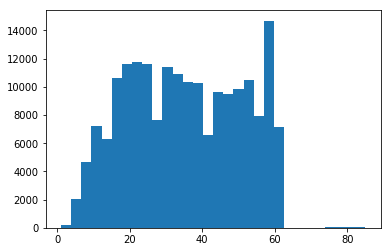

In [403]:
# Look at the distribution of project name lengths
plt.hist([len(x) for x in filtered_df[col]], bins=30)

In [404]:
# Look into:
# lenght of name vs successful / failed funding
# sentiment analysis vs. funding success

### The 'photo' column

In [405]:
col = 'photo'
filtered_df[col].describe()

count                                                192449
unique                                               168766
top       {"key":"assets/022/805/714/f48e42a894f1db2ab94...
freq                                                      2
Name: photo, dtype: object

In [406]:
filtered_df[col].head()

0    {"key":"assets/011/625/534/5bea1760d7f20943c4c...
1    {"key":"assets/024/033/030/dea4e3901d10195b035...
2    {"key":"assets/014/262/672/97944960ba30239051d...
3    {"key":"assets/023/008/626/aef53e2f326ad4c8772...
4    {"key":"assets/012/061/410/1687a735d5b1316ca47...
Name: photo, dtype: object

Another column that looks like str reprensentation of a dict

In [407]:
filtered_df[col].isna().sum()

0

In [408]:
eval(filtered_df[col][0])['1536x864']

'https://ksr-ugc.imgix.net/assets/011/625/534/5bea1760d7f20943c4cd5e9b4911c1bd_original.jpg?ixlib=rb-1.1.0&crop=faces&w=1552&h=873&fit=crop&v=1463685705&auto=format&frame=1&q=92&s=90c72b785ef97539099dffb8531dcad3'

In [409]:
# Turn strings into dicts and check for exceptions errors

del_idx = []
count = 0
for idx, x in enumerate(filtered_df[col]):

    try:
        filtered_df.at[idx, col] = eval(x.replace('false', 'False').replace('true', 'True').replace('null', 'None'))
        #eval(x.replace('null', 'None'))
    except:
        count += 1
        del_idx.append(idx)
print(count)

0


TODO: Analyse 'photos'

### The 'pledged' column

pledged data is given in native currencies. **So can be dropped in favour of 'usd_pledged' which gives pledged amount in same currency (USD)**

In [410]:
col = 'pledged'
filtered_df[col].dtypes

dtype('float64')

In [411]:
filtered_df[col].describe()

count    1.924490e+05
mean     1.971593e+04
std      3.352984e+05
min      0.000000e+00
25%      1.500000e+02
50%      1.800000e+03
75%      7.471000e+03
max      8.103074e+07
Name: pledged, dtype: float64

In [412]:
filtered_df[col].isna().sum()

0

No missing values 

In [413]:
filtered_df[col].value_counts()


0.00         15003
1.00          4971
10.00         1679
2.00          1341
5.00          1229
             ...  
7455.18          1
7182.67          1
11609.00         1
12477.00         1
262143.00        1
Name: pledged, Length: 43035, dtype: int64

15003 projects that pledged 0 USD?

In [414]:
droplist.append(col)
#filtered_df.drop('pledged', inplace=True, axis=1)

### The 'profile' column

In [415]:
col = 'profile'

filtered_df[col].head()

0    {"id":822687,"project_id":822687,"state":"inac...
1    {"id":3665299,"project_id":3665299,"state":"in...
2    {"id":2730508,"project_id":2730508,"state":"in...
3    {"id":3498742,"project_id":3498742,"state":"ac...
4    {"id":1754403,"project_id":1754403,"state":"in...
Name: profile, dtype: object

Yet another column with str reprensentation of a dict. Lets look into one entry:

In [416]:
entry = eval(filtered_df[col][0].replace('null', 'None').replace('false', 'False').replace('true', 'True'))
entry

{'id': 822687,
 'project_id': 822687,
 'state': 'inactive',
 'state_changed_at': 1425915845,
 'name': None,
 'blurb': None,
 'background_color': None,
 'text_color': None,
 'link_background_color': None,
 'link_text_color': None,
 'link_text': None,
 'link_url': None,
 'show_feature_image': False,
 'background_image_opacity': 0.8,
 'should_show_feature_image_section': True,
 'feature_image_attributes': {'image_urls': {'default': 'https://ksr-ugc.imgix.net/assets/011/625/534/5bea1760d7f20943c4cd5e9b4911c1bd_original.jpg?ixlib=rb-1.1.0&crop=faces&w=1552&h=873&fit=crop&v=1463685705&auto=format&frame=1&q=92&s=90c72b785ef97539099dffb8531dcad3',
   'baseball_card': 'https://ksr-ugc.imgix.net/assets/011/625/534/5bea1760d7f20943c4cd5e9b4911c1bd_original.jpg?ixlib=rb-1.1.0&crop=faces&w=560&h=315&fit=crop&v=1463685705&auto=format&frame=1&q=92&s=883b3ff098e5fc4cf6fec280665f5fd0'}}}

In [417]:
list(entry.keys())

['id',
 'project_id',
 'state',
 'state_changed_at',
 'name',
 'blurb',
 'background_color',
 'text_color',
 'link_background_color',
 'link_text_color',
 'link_text',
 'link_url',
 'show_feature_image',
 'background_image_opacity',
 'should_show_feature_image_section',
 'feature_image_attributes']

In [418]:
# Check which of the entries of the 'profile' column already exist as separate column s

for e in list(data.columns):
    if e in list(entry.keys()):
        print(e)

blurb
id
name
state
state_changed_at


In [419]:
## TODO: Check whether contents also match

Seems like a repetition of other columns. And some additional information. Well drop the column for now.

In [420]:
droplist.append(col)

### The 'slug' column

In [421]:
col = 'slug'
filtered_df[col].head()

0                                new-final-round-album
1                      princess-pals-enamel-pin-series
2    their-life-through-their-lens-the-amish-and-me...
3                             wao-the-eco-effect-shoes
4                       apple-watch-development-course
Name: slug, dtype: object

In [422]:
filtered_df['name'].head()

0                                New Final Round Album
1                      Princess Pals Enamel Pin Series
2    Their Life Through Their Lens-the Amish and Me...
3                            WAO: THE ECO EFFECT SHOES
4                       Apple Watch Development Course
Name: name, dtype: object

At first glance, this looks like the 'name' column in all lower case and with hyphens instead of whitespaces.

In [423]:
filtered_df[col].describe()

count                               192449
unique                              168766
top       murderbait-releases-a-new-record
freq                                     2
Name: slug, dtype: object

In [424]:
[filtered_df['name'].str.lower().replace(' ', '-').replace(':', '') == filtered_df[col]]

[0         False
 1         False
 2         False
 3         False
 4         False
           ...  
 192444    False
 192445    False
 192446    False
 192447    False
 192448    False
 Length: 192449, dtype: bool]

In [425]:
li = []
for i in range(10):
    
    li.append(filtered_df['name'][i].lower().replace(' ', '-').replace(':', '') == filtered_df['slug'][i])
    

In [426]:
filtered_df[col].str.len().max()

53

In [427]:
filtered_df[col][2]

'their-life-through-their-lens-the-amish-and-mennon'

In [428]:
filtered_df['name'][2].lower().replace(' ', '-').replace(':', '')

'their-life-through-their-lens-the-amish-and-mennonite-people'

In [429]:
filtered_df[col].str.lower().replace(' ', '-').replace(':', '')

0                                     new-final-round-album
1                           princess-pals-enamel-pin-series
2         their-life-through-their-lens-the-amish-and-me...
3                                  wao-the-eco-effect-shoes
4                            apple-watch-development-course
                                ...                        
192444                              steam-hollow-brewing-co
192445    fusion-detox-chef-alan-wichert-creates-the-health
192446                 gorgeous-princess-cheetah-collection
192447    the-lion-and-the-lyceum-childrens-book-based-o...
192448                   philip-e-west-aviation-masterworks
Name: slug, Length: 192449, dtype: object

### The 'source_url' column

In [430]:
col = 'source_url'
filtered_df[col][1000]

'https://www.kickstarter.com/discover/categories/fashion'

This is just an url to the category of the project, drop.

In [431]:
droplist.append(col)

### The 'staff_pick' column

staff_pick - whether a project was highlighted as a staff_pick when it was launched/live

Seems like an interesting variable. 

In [432]:
col = 'staff_pick'

filtered_df[col].head()

0    False
1    False
2     True
3    False
4    False
Name: staff_pick, dtype: bool

In [433]:
filtered_df[col].value_counts()

False    166509
True      25940
Name: staff_pick, dtype: int64

In [434]:
round(25940/(25940+166509)*100, 2)

13.48

13.48 % of projects where highlighted as staff_pick, when they were launched/live.

### The 'state_changed_at' column
state_changed_at - date and time of when a project's status was changed (same as the deadline for successful and failed projects)

In [435]:
col = 'state_changed_at'

filtered_df[col].head()

0    1391899046
1    1551801611
2    1480607932
3    1544309940
4    1428511019
Name: state_changed_at, dtype: int64

In [436]:
# Conver to datetime object
filtered_df[col] = pd.to_datetime(filtered_df[col], unit='s')

### The 'static_usd_rate' column

static_usd_rate - conversion rate between the original currency and USD

In [437]:
col = 'static_usd_rate'

filtered_df[col].head()

0    1.000000
1    1.000000
2    1.000000
3    1.136525
4    1.000000
Name: static_usd_rate, dtype: float64

Assume column is just a mulitplier to convert 'pledge' to 'usd_plegded', drop.

In [438]:
droplist.append(col)

### The 'urls' columns
urls - url to the project's page

In [439]:
col = 'urls'

filtered_df[col].head()

0    {"web":{"project":"https://www.kickstarter.com...
1    {"web":{"project":"https://www.kickstarter.com...
2    {"web":{"project":"https://www.kickstarter.com...
3    {"web":{"project":"https://www.kickstarter.com...
4    {"web":{"project":"https://www.kickstarter.com...
Name: urls, dtype: object

In [440]:
eval(filtered_df[col][0])

{'web': {'project': 'https://www.kickstarter.com/projects/1495925645/new-final-round-album?ref=discovery_category_newest',
  'rewards': 'https://www.kickstarter.com/projects/1495925645/new-final-round-album/rewards'}}

Just links to the project page, drop.

In [441]:
droplist.append(col)

### The 'usd_pledged' column
usd_pledged - amount pledged in USD

In [23]:
col = 'usd_pledged'

filtered_df[col].head()

0      802.00000
1     2259.00000
2    29638.00000
3    49075.15252
4      549.00000
Name: usd_pledged, dtype: float64

In [443]:
filtered_df[col].describe()

count    1.924490e+05
mean     1.352750e+04
std      8.923302e+04
min      0.000000e+00
25%      1.500000e+02
50%      1.771000e+03
75%      7.100000e+03
max      8.596475e+06
Name: usd_pledged, dtype: float64

In [444]:
filtered_df[col].isna().sum()

0

In [24]:
filtered_df[col].value_counts()

0.000000       15009
1.000000        3561
10.000000       1116
25.000000        972
2.000000         917
               ...  
207.592866         1
1101.160000        1
952.907287         1
2.389871           1
313.456542         1
Name: usd_pledged, Length: 75218, dtype: int64

In [31]:
filtered_df[filtered_df[col] == np.float(0)]['state'].value_counts()

failed    15009
Name: state, dtype: int64

In [ ]:
col = 'usd_pledged'

for idx, x in enumerate(filtered_df[col]):
    if x == np.float(0):
        filtered_df.drop(idx, axis=0, inplace=True)

filtered_df.reset_index(inplace=True)

### The 'usd_type' column
usd_type - domestic or international

In [21]:
col = 'usd_type'

filtered_df[col].head()

0    international
1    international
2    international
3    international
4         domestic
Name: usd_type, dtype: object

In [447]:
filtered_df[col].unique()

array(['international', 'domestic', nan], dtype=object)

In [448]:
filtered_df[col].isna().sum()

38

38 missing values, but can be ignored as columns will be dropped anyways.

In [449]:
droplist.append(col)

In [450]:
droplist

['is_backing',
 'is_starred',
 'permissions',
 'pledged',
 'profile',
 'source_url',
 'static_usd_rate',
 'urls',
 'usd_type']

In [452]:
filtered_df.shape

(192449, 27)

In [453]:
filtered_df.drop(droplist, axis=1, inplace=True)

In [454]:
filtered_df.shape

(192449, 18)

In [455]:
filtered_df.columns

Index(['level_0', 'index', 'is_starrable', 'launched_at', 'location', 'name',
       'photo', 'slug', 'spotlight', 'staff_pick', 'state', 'state_changed_at',
       'usd_pledged', 'weekday', 'year', 'month', 'day', 'hour'],
      dtype='object')